## Steps :
    1. Loading Libraries
    2. Reading the dataset
    3. Select the feature (independent) and the target (dependent)
    4. Split the data into train and test
    5. Create the model and fit it with the training data
    6. Predict the target for the test data
    7. evaluate the model
    8. Visualise the model
    9. Save the model
    10. load the model

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [116]:
aumtomobile_data_url='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv'
df=pd.read_csv(aumtomobile_data_url,index_col=0)

In [117]:
pd.set_option('display.max_columns',None)

In [118]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Creating the simple linear regression for horsepower vs price

## Pre Processing

In [119]:
numerical_col = ['normalized-losses','wheel-base','length','width','height',
'curb-weight','engine-size','bore','stroke','compression-ratio','horsepower',
'peak-rpm','city-mpg','highway-mpg','price']

categorical_col = ['symboling','make','fuel-type','aspiration','num-of-doors','body-style',
'drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [120]:
# remove all ? from dataframe
df.replace('?', np.nan, inplace=True)

# numerical column with missing values
df[numerical_col].isnull().sum()

In [121]:
df[categorical_col].isnull().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [122]:
num_col_with_na = ['normalized-losses','bore','stroke','horsepower','peak-rpm']
cat_col_with_na = ['num-of-doors']

In [123]:
from sklearn.impute import SimpleImputer

In [124]:
num_imp = SimpleImputer()
cat_imp = SimpleImputer(strategy='most_frequent')

In [125]:
df[num_col_with_na] = num_imp.fit_transform(df[num_col_with_na])

In [126]:
df[cat_col_with_na] = cat_imp.fit_transform(df[cat_col_with_na])

In [127]:
## converting text data to numerical data
df[categorical_col].nunique()

symboling            6
make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          7
num-of-cylinders     7
fuel-system          8
dtype: int64

In [128]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
binary_cols = ['fuel-type','aspiration','num-of-doors','engine-location']
ordinal_enc = OrdinalEncoder()

df[binary_cols]= ordinal_enc.fit_transform(df[binary_cols])
## Dropping null from Price as we are going to calculate the same
df.dropna(subset=['price'],inplace=True)
df['price']=df['price'].astype('float')
# Save it as CSV
df.to_csv('clean_automobile.csv')

In [129]:
dataset=df[['horsepower','price']].copy()
dataset.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


<AxesSubplot:xlabel='horsepower', ylabel='price'>

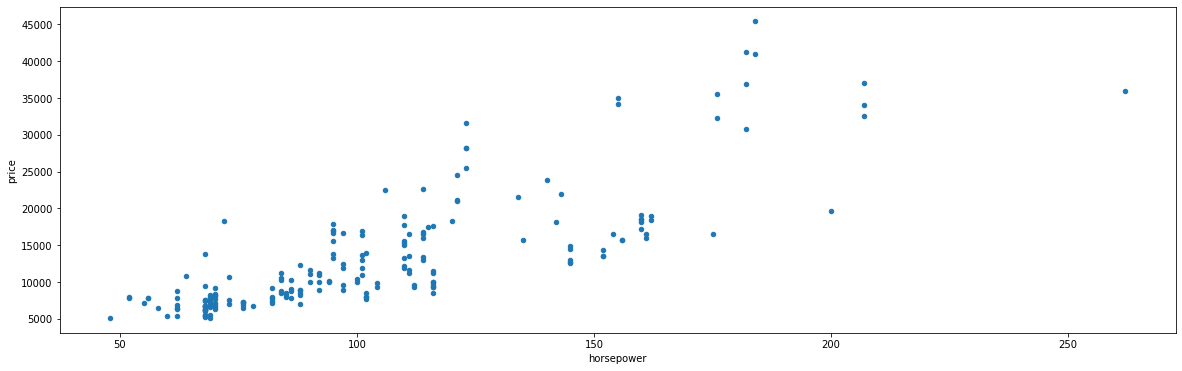

In [130]:
dataset.plot(kind='scatter',x='horsepower',y='price',figsize=(20,6))

In [131]:
X=dataset[['horsepower']] ## Taken as a 2-D Matrix  Independent
y=dataset['price']  # Taken as a 1-D Matrix


# Split the data into Train and Test in a ratio of 80 : 20


In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [133]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [134]:
print('intercept',reg.intercept_)
print('coef',reg.coef_)

intercept -4118.879446320821
coef [165.57449341]


In [135]:
y_pred=reg.predict(X_test)  # Predicted Values
r2_score(y_test,y_pred)  # r2 Score :: Higher the better

0.7827421900758174

In [136]:
mse=mean_squared_error(y_test,y_pred)   ## Mean squared error :: Lower the better
mae=mean_absolute_error(y_test,y_pred)  ## Mean absolute error :: Lower the better

In [137]:
print('mse = ',mse)
print('mae = ',mae)

mse =  16461687.666475942
mae =  3156.3311728145854


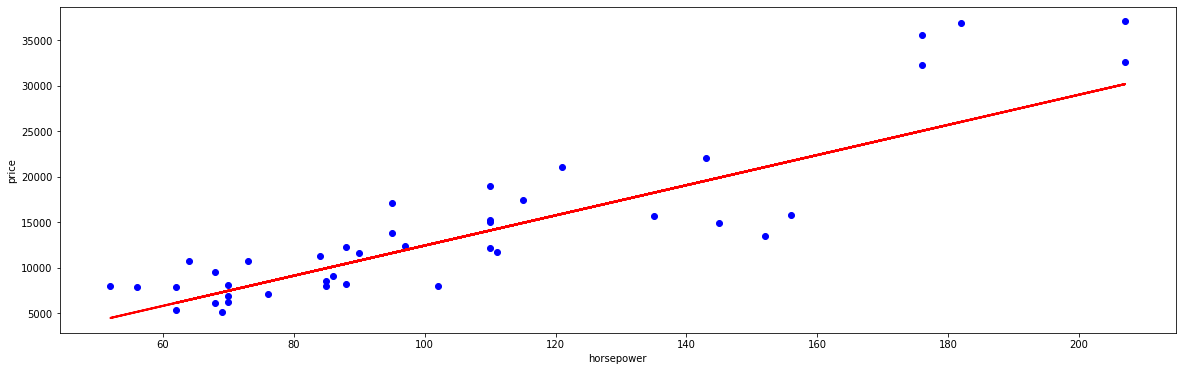

In [138]:
fig, ax=plt.subplots(figsize=(20,6))
ax.scatter(X_test,y_test,color='blue')
ax.plot(X_test,y_pred,color='red',linewidth=2)
ax.set_xlabel('horsepower')
ax.set_ylabel('price')
plt.show()

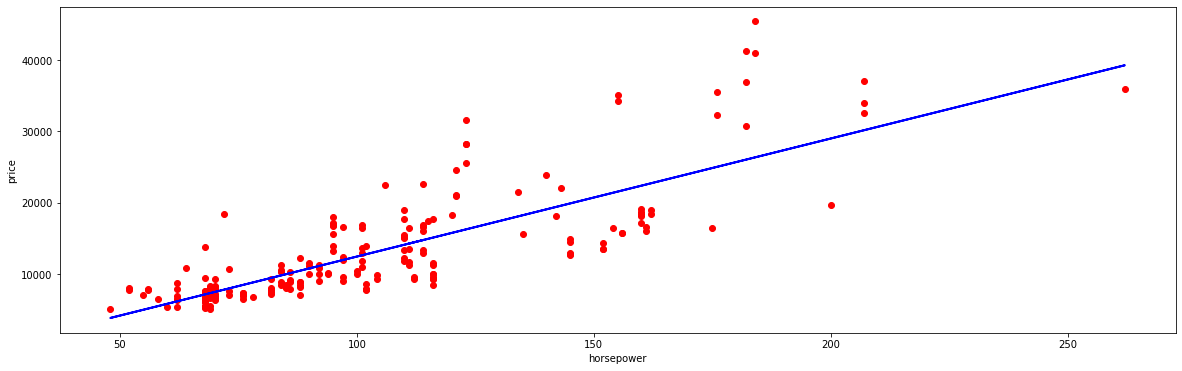

In [139]:
fig, ax=plt.subplots(figsize=(20,6))
ax.scatter(X,y,color='red')
ax.plot(X,reg.predict(X),color='blue',linewidth=2)
ax.set_xlabel('horsepower')
ax.set_ylabel('price')
plt.show()

In [140]:
price_for175 = reg.predict(np.array([[175]]))[0] # predict the price for horsepower of 175
print(price_for175)

24856.656901078117


c:\Users\KumarCha05\Miniconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [141]:
horse_power_list = [[100],[50],[150],[200]]
prices = reg.predict(np.array(horse_power_list))
print(prices)

[12438.56989505  4159.84522436 20717.29456574 28996.01923642]


c:\Users\KumarCha05\Miniconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [142]:
from joblib import dump, load

In [143]:
dump(reg, 'price_by_hp.joblib')

['price_by_hp.joblib']

In [144]:
loaded_model = load('price_by_hp.joblib')
print(loaded_model.predict(np.array([[175]])))

[24856.65690108]


c:\Users\KumarCha05\Miniconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
